# Proyek Analisis Data: Bike Sharing
- **Nama:** Mudita
- **Email:** muditaindah@gmail.com
- **ID Dicoding:** muditaindah

## Menentukan Pertanyaan Bisnis

1. Bagaimana strategi pemasaran (promo, bundling, dll.) yang efektif untuk meningkatkan penjualan?
2. Strategi apa yang harus diterapkan untuk meningkatkan pengalaman pelanggan dan membuat operasional lebih efisien?

Untuk menjawab pertanyaan ini, kita perlu mengklasifikasikan pola penggunaan sepeda menggunakan dataset yang tersedia. Hal ini dapat dilakukan dengan menganalisis perilaku pengguna berdasarkan waktu dan kondisi cuaca. Dengan cara ini, kita dapat mengidentifikasi dan mengkategorisasi pola pelanggan.

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
zip_path = "/content/Bike-sharing-dataset.zip"

extract_folder = "/content/bike_dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Files extracted to", extract_folder)

Files extracted to /content/bike_dataset


In [3]:
datasets = "/content/bike_dataset"

csv_files = [f for f in os.listdir(datasets) if f.endswith(".csv")]
print("List of CSV files in folder: ", csv_files)

List of CSV files in folder:  ['hour.csv', 'day.csv']


In [4]:
df_hour = pd.read_csv("/content/bike_dataset/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat dua file CSV, yang berbeda hanya pada bagian kolom *hour*. Saya memutuskan untuk menggunakan kolom hour untuk menganalisis pola pelanggan
- Dataset yang tersedia merupakan data dari tahun 2011-2012

### Assessing Data

In [5]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
df_hour.duplicated().sum()

0

In [8]:
numerical_cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]

Q1 = df_hour[numerical_cols].quantile(0.25)
Q3 = df_hour[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
cut_off = 1.5 * IQR
maximum = Q3 + cut_off
minimum = Q1 - cut_off

outliers = (df_hour[numerical_cols] < minimum) | (df_hour[numerical_cols] > maximum)

print("Outlier per column:")
print(outliers.sum())

Outlier per column:
temp             0
atemp            0
hum             22
windspeed      342
casual        1192
registered     680
cnt            505
dtype: int64


**Insight:**
- Tidak ada missing values dan duplicated values
- Ada data outlier, tetapi tidak signifikan di bagian casual, registered, cnt karena data outlier pada kolom tersebut sangat penting

### Cleaning Data

In [9]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [10]:
outlier_columns = ["hum", "windspeed"]

impute_method = "median"
if impute_method == "median":
    for col in outlier_columns:
        df_hour[col] = df_hour[col].mask(outliers[col], df_hour[col].median(), axis=0)
elif impute_method == "mean":
    for col in outlier_columns:
        df_hour[col] = df_hour[col].mask(outliers[col], df_hour[col].mean(), axis=0)

In [11]:
outliers_check = (df_hour[numerical_cols] < minimum) | (df_hour[numerical_cols] > maximum)
print(outliers_check.sum())

temp             0
atemp            0
hum              0
windspeed        0
casual        1192
registered     680
cnt            505
dtype: int64


**Insight:**
- Mengubah jenis data pada kolom hari
- Mengatasi outlier di kolom Hum dan Wind Speed dengan imputation

## Exploratory Data Analysis (EDA)

### Explore ...

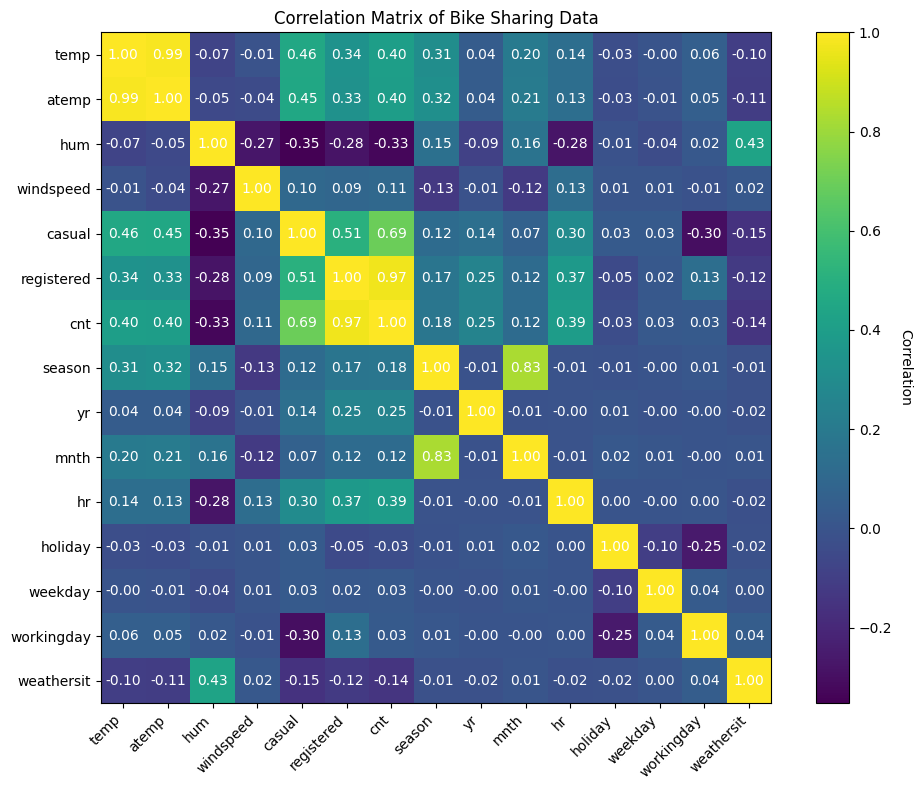

In [12]:
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
                      'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']


correlation_matrix = df_hour[numerical_features].corr()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(correlation_matrix, cmap='viridis')

ax.set_xticks(np.arange(len(numerical_features)))
ax.set_yticks(np.arange(len(numerical_features)))
ax.set_xticklabels(numerical_features, rotation=45, ha='right')
ax.set_yticklabels(numerical_features)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")

for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                       ha="center", va="center", color="w")

ax.set_title("Correlation Matrix of Bike Sharing Data")
plt.tight_layout()
plt.show()

In [13]:
# Seasons Correlation

seasons_df = df_hour[['yr', 'season', 'casual', 'registered']]
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

melted_df = pd.melt(seasons_df, id_vars=['yr', 'season'], var_name='status', value_name='ride per day')

grouped_df = melted_df.groupby(['yr', 'season', 'status'])['ride per day'].sum().reset_index()

grouped_df["season"] = grouped_df["season"].map(season_labels)

In [14]:
# Hour Correlation
hour_corr_df = df_hour[['season', 'hr', 'casual', 'registered']]

df_hour["time_period"] = "Other"
df_hour.loc[df_hour["hr"].between(0, 6), "time_period"] = "Early Morning"
df_hour.loc[df_hour["hr"].between(7, 9) | df_hour["hr"].between(16, 19), "time_period"] = "Peak Hour"
df_hour.loc[df_hour["hr"].between(10, 15), "time_period"] = "Noon Riders"
df_hour.loc[df_hour["hr"].between(20, 23), "time_period"] = "Night Riders"

hourly_totals = df_hour.groupby(["hr", "time_period"], as_index=False)["cnt"].sum()


In [15]:
# Day Correlation
day_type_df = df_hour[['season', 'weekday', 'workingday', 'casual', 'registered']]


**Insight:**
- Korelasi belum terlihat jelas apabila tidak dilihat dari setiap musim, setiap tahu, maupun setiap bulan. Maka dari itu, perlu menelaah lebih lanjut

## Visualization & Explanatory Analysis

### Pertanyaan 1 dan 2

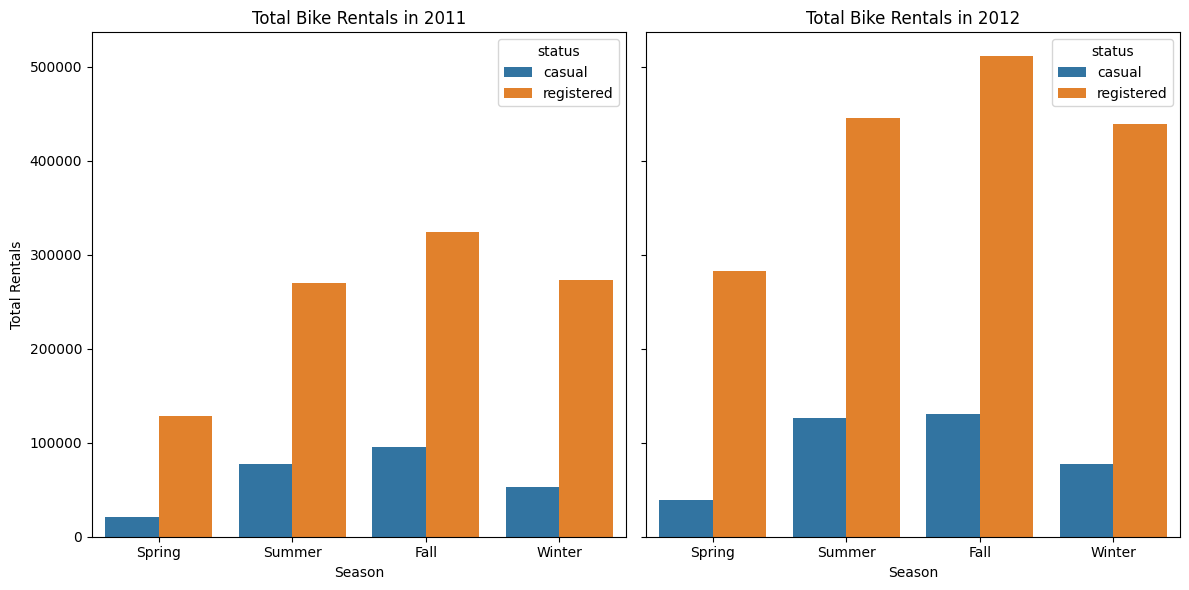

In [16]:
# Plot for Season Correlation
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.barplot(data=grouped_df[grouped_df["yr"] == 0], x="season", y="ride per day", hue="status", ax=axes[0])
axes[0].set_title("Total Bike Rentals in 2011")
axes[0].set_xlabel("Season")
axes[0].set_ylabel("Total Rentals")

sns.barplot(data=grouped_df[grouped_df["yr"] == 1], x="season", y="ride per day", hue="status", ax=axes[1])
axes[1].set_title("Total Bike Rentals in 2012")
axes[1].set_xlabel("Season")

plt.tight_layout()
plt.show()

**Wawasan dari Grafik Musim:**  

- Musim semi mengalami jumlah penyewaan sepeda paling sedikit, kemungkinan karena kondisi cuaca yang tidak menentu.  
- Penyewaan tetap relatif rendah selama musim dingin, terutama karena suhu dingin dan kemungkinan turunnya salju.  
- Terjadi peningkatan signifikan dalam penyewaan selama musim panas, yang didorong oleh kondisi cuaca yang lebih bersahabat dan periode liburan.  
- Musim gugur mencatat jumlah penyewaan tertinggi, karena suhu yang sejuk dan cuaca yang stabil.  

**Jawaban untuk pertanyaan pertama:**  

- Karena musim semi memiliki jumlah penyewaan paling sedikit akibat cuaca yang tidak menentu, fokusnya harus pada menarik lebih banyak pengguna. Menawarkan diskon dan opsi penyewaan yang fleksibel dapat mendorong lebih banyak orang untuk menggunakan sepeda.  
- Dengan meningkatnya penyewaan sepeda di musim panas, memperpanjang jam operasional penyewaan dan menawarkan opsi penyewaan multi-hari dapat membantu memenuhi permintaan dan menarik lebih banyak penyewa kasual.  
- Musim gugur mencatat jumlah penyewaan tertinggi. Kita dapat memperkenalkan paket berlangganan, karena banyak pengguna baru mungkin mempertimbangkan sepeda sebagai solusi transportasi jangka panjang.  
- Perkenalkan insentif bersepeda di musim dingin, seperti diskon untuk pengguna setia atau hadiah bagi mereka yang menyelesaikan sejumlah perjalanan tertentu.  

**Jawaban untuk pertanyaan kedua:**  

- Untuk memenuhi permintaan tinggi di musim gugur, sepeda harus didistribusikan dengan efisien agar tersedia di area sibuk. Perawatan rutin juga akan membantu menjaga kondisi sepeda saat memasuki bulan-bulan yang lebih dingin.  
- Di musim dingin, penyewaan menurun akibat cuaca dingin dan kemungkinan salju, sehingga operasional harus berfokus pada pengurangan biaya sambil tetap menjaga layanan. Selain itu, mengurangi jumlah sepeda yang tersedia dan memprioritaskan perawatan serta perbaikan akan membantu persiapan untuk musim puncak berikutnya.  
- Untuk musim semi, menyediakan jas hujan di stasiun penyewaan dapat membantu pengguna merasa lebih siap menghadapi cuaca yang tidak menentu, sehingga mendorong lebih banyak orang untuk menyewa sepeda.  
- Di musim panas, dengan meningkatnya penyewaan akibat cuaca hangat dan liburan, penting untuk menyediakan lebih banyak sepeda, terutama di area wisata dan taman, guna memenuhi permintaan yang lebih tinggi.

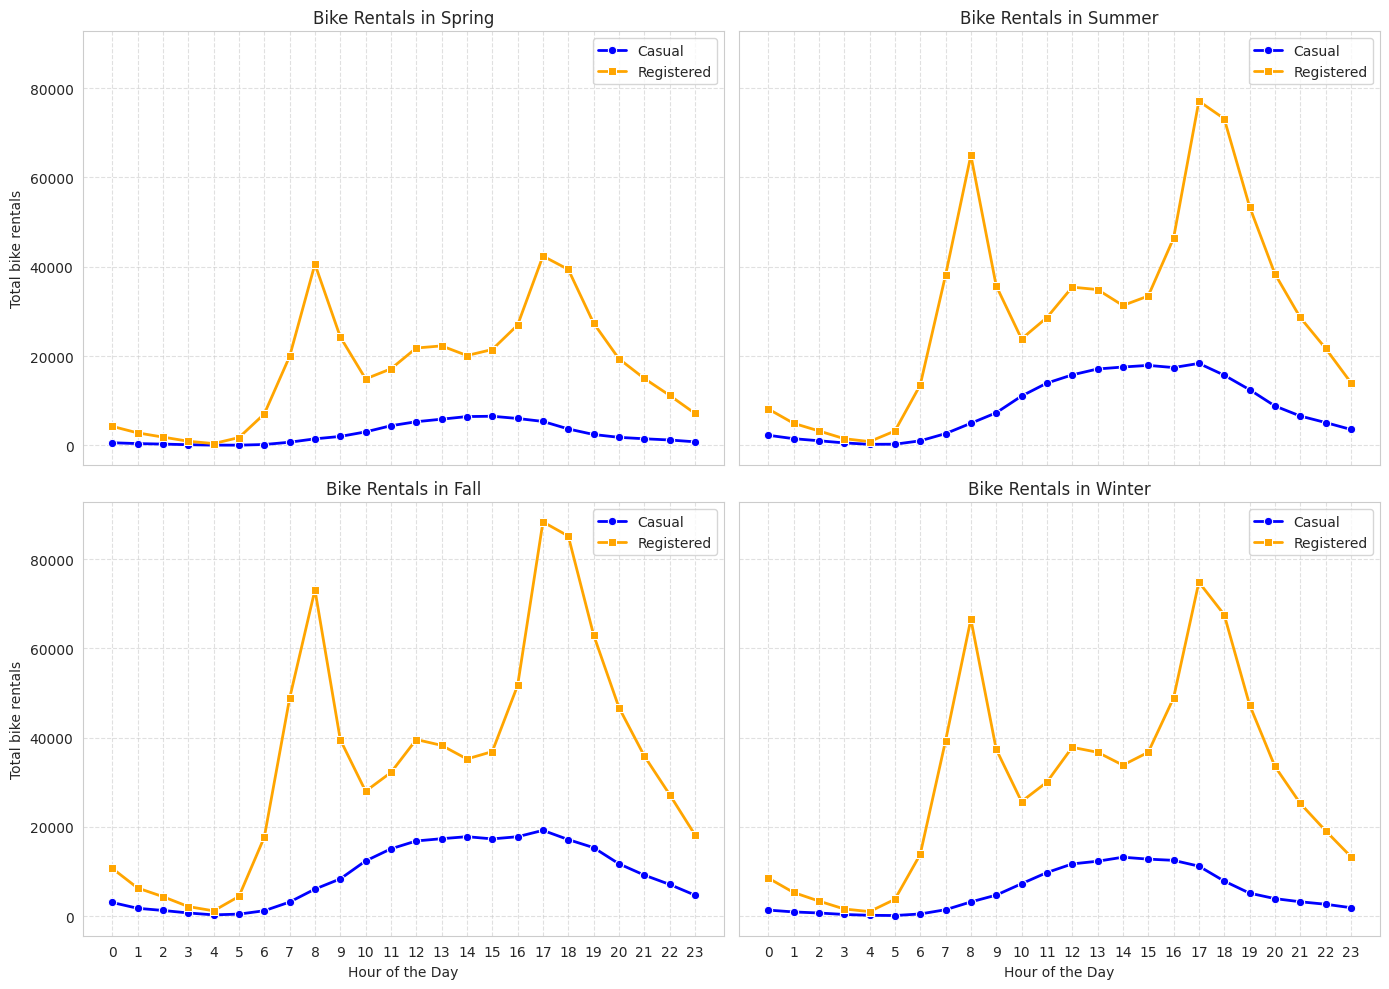

In [17]:
# Plot for Hour Correlation
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)

for idx, (season, label) in enumerate(season_labels.items()):
    ax = axes[idx // 2, idx % 2]
    season_df = hour_corr_df[hour_corr_df["season"] == season].groupby("hr").sum().reset_index()

    sns.lineplot(data=season_df, x="hr", y="casual", label="Casual", ax=ax, marker="o", color="blue", linewidth=2)
    sns.lineplot(data=season_df, x="hr", y="registered", label="Registered", ax=ax, marker="s", color="orange", linewidth=2)

    ax.set_xticks(range(0, 24, 1))
    ax.set_title(f"Bike Rentals in {label}")
    ax.set_xlabel("Hour of the Day")
    ax.set_ylabel("Total bike rentals")
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

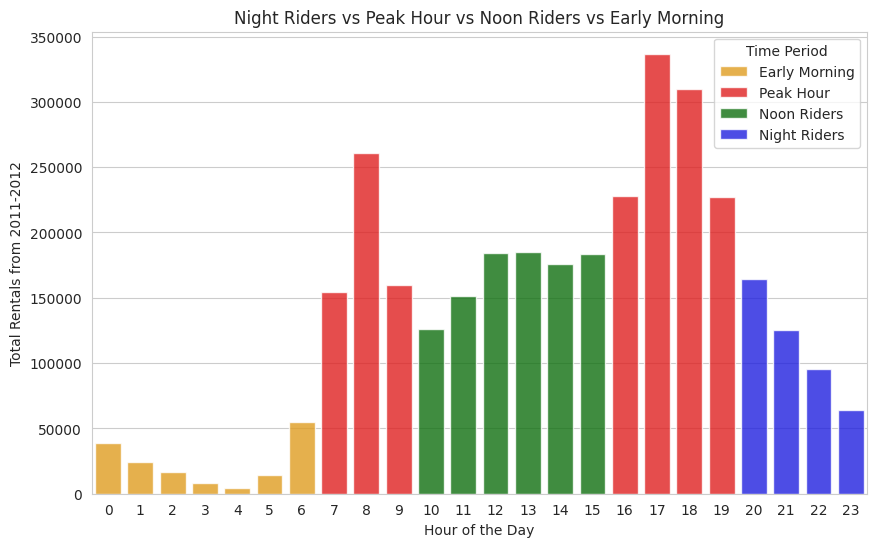

In [18]:
#Scatter plot for Hour Correlation from 2011 - 2012
plt.figure(figsize=(10, 6))

sns.barplot(data=hourly_totals, x="hr", y="cnt", hue="time_period", alpha=0.8,
            palette={"Early Morning": "orange", "Peak Hour": "red",
                     "Night Riders": "blue", "Noon Riders": "green"})

plt.xlabel("Hour of the Day")
plt.ylabel("Total Rentals from 2011-2012")
plt.title("Night Riders vs Peak Hour vs Noon Riders vs Early Morning")
plt.legend(title="Time Period")

plt.show()

Wawasan dari Grafik Jam:

- Untuk pengguna terdaftar, jam sibuk terjadi pada pukul 5 AM – 8 AM dan 3 PM – 6 PM di semua musim.
- Untuk pengguna kasual, permintaan meningkat dari pukul 10 AM – 6 PM, dengan puncaknya di sore hari.


**Jawaban untuk pertanyaan pertama:**
- Untuk mengoptimalkan pendapatan dan menyeimbangkan permintaan, menerapkan harga dinamis (surge pricing) selama jam sibuk komuter dapat membantu memaksimalkan keuntungan.
- Selain itu, menawarkan diskon atau paket promosi bagi pengguna kasual di pagi hari atau larut malam dapat mendorong penggunaan selama waktu non-sibuk, sehingga permintaan lebih merata sepanjang hari.

**Jawaban untuk pertanyaan kedua:**
- Menyediakan titik temu khusus bagi komuter di dekat stasiun transportasi dan kawasan bisnis untuk memastikan sepeda selalu tersedia.
- Menyediakan dukungan pelanggan dan bantuan darurat bagi pengguna malam melalui aplikasi seluler atau hotline.








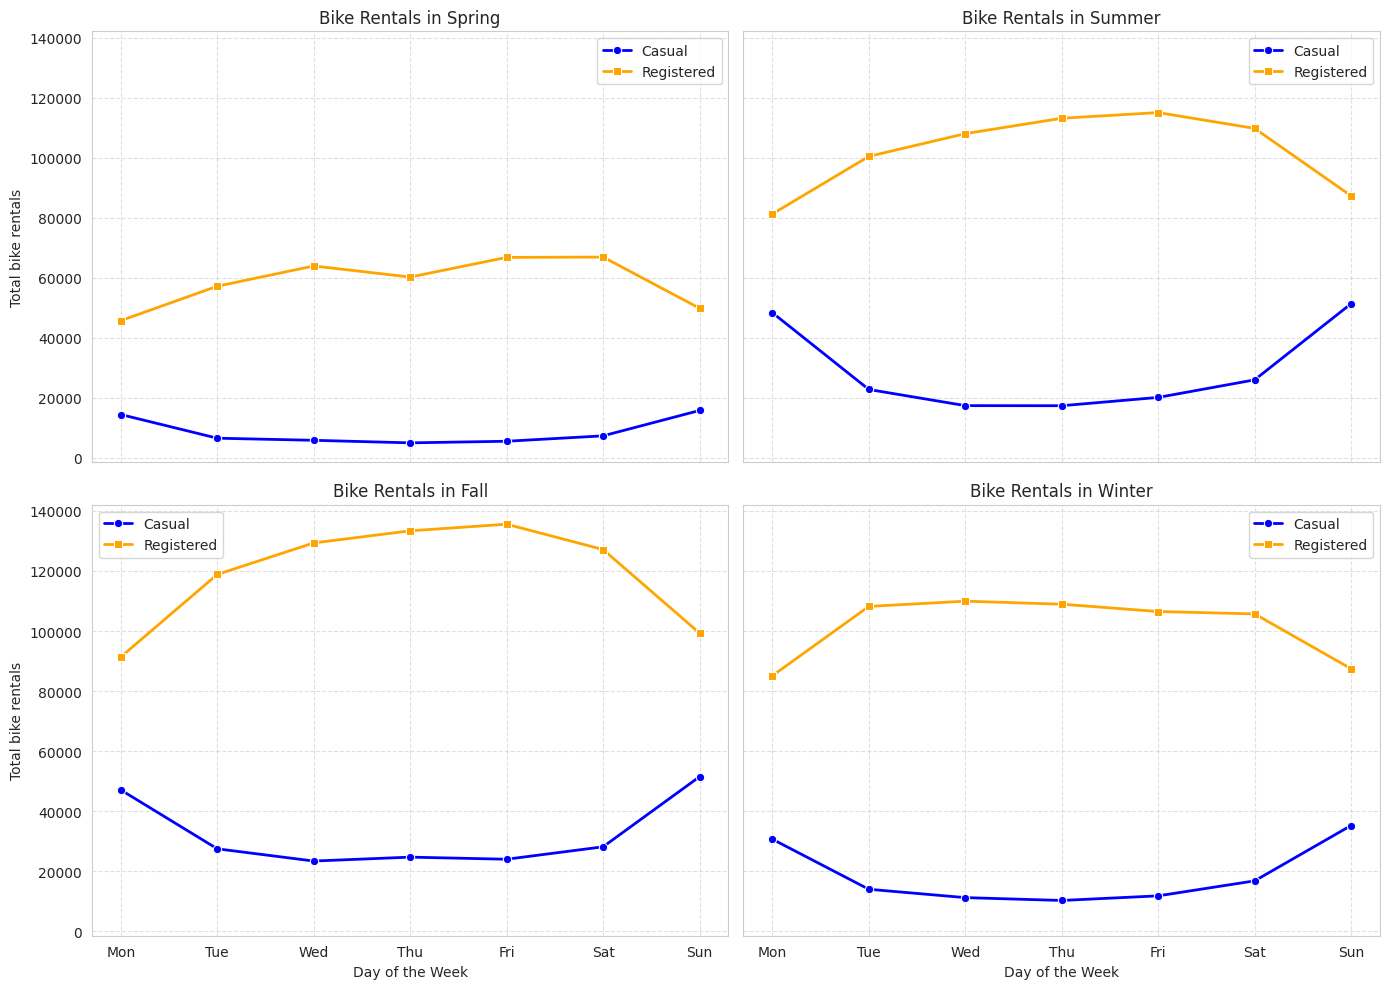

In [19]:
# Plot for day correlation
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)

for idx, (season, label) in enumerate(season_labels.items()):
    ax = axes[idx // 2, idx % 2]
    season_df = day_type_df[day_type_df["season"] == season].groupby(["weekday"]).sum().reset_index()

    sns.lineplot(data=season_df, x="weekday", y="casual", label="Casual", ax=ax, marker="o", color="blue", linewidth=2)
    sns.lineplot(data=season_df, x="weekday", y="registered", label="Registered", ax=ax, marker="s", color="orange", linewidth=2)

    ax.set_xticks(range(0, 7))
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_title(f"Bike Rentals in {label}")
    ax.set_xlabel("Day of the Week")
    ax.set_ylabel("Total bike rentals")
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

Wawasan dari Grafik Hari:

- Pengguna terdaftar secara konsisten menyewa lebih banyak sepeda pada hari kerja di semua musim.
- Penyewaan kasual mengalami peningkatan signifikan pada akhir pekan.

**Jawaban untuk pertanyaan pertama:**
- Mengingat bahwa pengguna terdaftar terutama menyewa sepeda pada hari kerja, menerapkan diskon atau program loyalitas bagi para komuter dapat meningkatkan penggunaan jangka panjang.
- Untuk pengguna kasual, lonjakan penyewaan pada akhir pekan menjadi peluang untuk memperkenalkan harga khusus akhir pekan atau diskon untuk keluarga/kelompok guna menarik lebih banyak penyewa.

**Jawaban untuk pertanyaan kedua:**
- Dari perspektif operasional, memastikan ketersediaan sepeda yang lebih tinggi di distrik bisnis selama hari kerja dapat membantu memenuhi permintaan komuter.
- Pada akhir pekan, menempatkan lebih banyak sepeda di area rekreasi, taman, dan lokasi wisata secara strategis dapat meningkatkan aksesibilitas bagi pengguna kasual.

## Conclusion

**Jawaban pertanyaan pertama**

Untuk memaksimalkan keuntungan dan meningkatkan penggunaan sepeda berbagi, strategi diskon dapat disesuaikan dengan pola penyewaan berdasarkan musim, hari, dan jam:

- Musim semi: Karena penyewaan rendah akibat cuaca yang tidak menentu, diskon besar atau promo seperti "sewa 2 jam, gratis 1 jam" dapat menarik lebih banyak pengguna.
- Musim panas: Dengan meningkatnya permintaan, promo paket multi-hari atau diskon grup/family dapat mendorong wisatawan dan pengguna kasual.
- Musim gugur: Penyewaan tertinggi terjadi pada musim ini, sehingga penawaran program loyalitas atau langganan dapat mengonversi pengguna kasual menjadi pelanggan tetap.
- Musim dingin: Insentif seperti diskon bagi pengguna setia atau reward untuk pengguna yang mencapai jumlah perjalanan tertentu dapat meningkatkan penggunaan.

- Hari kerja: Program diskon khusus langganan bulanan dapat meningkatkan retensi pengguna terdaftar yang menggunakan sepeda untuk bekerja.
- Akhir pekan: Meningkatkan penggunaan dengan harga khusus akhir pekan atau paket grup dan keluarga untuk menarik wisatawan dan pengguna rekreasi.

- Jam sibuk (5 AM – 8 AM & 3 PM – 6 PM): Penerapan harga dinamis untuk memaksimalkan pendapatan dari pengguna terdaftar yang menggunakan sepeda untuk keperluan kerja.

- Jam non-sibuk (pagi dan malam hari): Menawarkan diskon khusus untuk pengguna kasual agar mereka lebih tertarik menyewa sepeda di luar jam sibuk.

**Jawaban Pertanyaan Kedua**

Untuk meningkatkan efisiensi operasional dan memastikan sepeda tersedia di waktu dan lokasi yang tepat, strategi berikut dapat diterapkan:


- Musim semi: Menyediakan jas hujan di stasiun penyewaan untuk mengatasi cuaca yang tidak menentu.
- Musim panas: Memastikan stok sepeda lebih banyak di area wisata dan taman untuk memenuhi lonjakan permintaan.
- Musim gugur: Pengecekan rutin dan perawatan lebih intensif karena penggunaan sepeda berada di puncaknya.
- Musim dingin: Mengurangi jumlah sepeda yang tersedia untuk menghemat biaya operasional dan lebih fokus pada perawatan armada untuk musim berikutnya.

- Hari kerja: Memastikan distribusi sepeda yang optimal di distrik bisnis dan dekat stasiun transportasi untuk memenuhi kebutuhan komuter.
- Akhir pekan: Menempatkan lebih banyak sepeda di area rekreasi, taman, dan lokasi wisata untuk meningkatkan aksesibilitas bagi pengguna kasual.

- Jam sibuk: Menyediakan stasiun pengisian ulang cepat dan redistribusi sepeda lebih sering di kawasan bisnis dan transportasi.
- Jam non-sibuk: Fokus pada perawatan sepeda dan pengisian ulang di lokasi strategis agar siap digunakan saat permintaan meningkat.
- Malam hari: Menyediakan dukungan pelanggan dan layanan darurat melalui aplikasi atau hotline untuk meningkatkan keamanan pengguna.

In [20]:
df_hour.to_csv("df_hour.csv", index=False)